## load package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [3]:
import lazypredict

## import data

In [4]:
!pwd

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml/binary_classification


In [5]:
master_micro = pd.read_csv("../../0_data/master.csv")

In [6]:
master_micro

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,...,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,...,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,...,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,...,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,...,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,600,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,...,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,601,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,...,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,602,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,...,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,603,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,...,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [7]:
micro = master_micro.iloc[: , 3:]

In [8]:
pd.set_option('display.max_columns', None)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.0,0.067,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.0,0.059,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.0,0.065,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.0,0.069,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


## data processing

### Other processing

In [9]:
# Drop the columns (filter1, filter2, ...)
to_drop = micro.filter(regex='^Filter').columns
micro = micro.drop(columns=to_drop)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.0,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.0,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.0,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.0,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [10]:
micro = micro.drop(columns=['hash', 'size_micro', 'Krumbein Rnd']) #'Krumbein Rnd'
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0.333,0.0,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0.350,0.0,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0.442,0.0,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0.276,0.0,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,soil


### Redersampling

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [11]:
# !pip install imblearn

In [12]:
# from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

In [13]:
micro.groupby('type_micro').describe()

Da                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        478354.0  0.309549  0.312157  0.024  0.210  0.254  0.326  13.303   

                  Dp                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        478354.0  0.347074  0.357904  0.058  0.230  0.283  0.365  16.888   

              FWidth                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        478354.0  0.308842  0.311139  0.019  0.202  0.256  0.337  12.966   

             FLength                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        478354.0  0.483931  0.466925  0.074  0.302  0.401  0.537  17.865   

           FThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.130  0.170  16.445   
soil         478354.0  0.214746  0.217460  0.019  0.142  0.172  0.223  11.317   

             ELength                                                           \
               count      mean       std    min    25%    50%     75%     max   
type_micro                                                                      
lithic        5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        478354.0  0.488259  0.469813  0.041  0.296  0.400  0.5510  16.400   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil         478354.0  0.210797  0.214129  0.014  0.139  0.169  0.219  11.309   

              EWidth                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        478354.0  0.301420  0.306822  0.014  0.198  0.249  0.329  13.021   

              Volume                                                   \
               count       mean         std  min    25%    50%    75%   
type_micro                                                              
lithic        5299.0  16.602042  236.156080  0.0  0.002  0.003  0.007   
soil        478354.0   0.197519    4.990939  0.0  0.005  0.009  0.020   

                          Area                                            \
                 max     count      mean        std    min    25%    50%   
type_micro                                                                 
lithic      9202.973    5299.0  2.214862  25.126003  0.001  0.020  0.029   
soil        1282.697  478354.0  0.151789   1.001118  0.000  0.035  0.051   

                           Perimeter            

In [14]:
# define the undersampling method
# undersample = SMOTE(sampling_strategy='minority')
# undersample = TomekLinks(sampling_strategy='majority')
undersample = RandomUnderSampler(random_state=42, replacement=True)
# undersample = CondensedNearestNeighbour(n_neighbors=1)

# Separate majority and minority classes
class_column = ['type_micro']
X = micro.drop(columns=class_column)
y = micro[class_column]

X_resampled, y_resampled = undersample.fit_resample(X, y)

In [15]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [16]:
data_resampled.columns = X.columns.tolist() + ['type_micro']


In [17]:
data_resampled

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,0.213,0.234,0.195,0.313,0.159,0.284,0.156,0.192,0.005,0.036,0.735,0.036,0.733,0.911,1.963,0.510,0.681,0.464,0.549,0.829,0.984,0.016,0.997,0.715,0.462,0.000,0.143,1.604,0.624,1.224,0.817,0.145,0.177,68.000,1.820,0.207,0.161,soil
10594,0.340,0.410,0.201,0.550,0.201,0.570,0.204,0.204,0.012,0.091,1.288,0.093,1.286,0.829,2.730,0.366,0.618,0.382,0.358,0.687,0.973,0.027,0.998,0.819,0.552,0.000,0.363,2.730,0.366,1.000,1.000,0.373,0.201,68.000,2.792,0.418,0.217,soil
10595,0.467,0.511,0.516,0.704,0.378,0.661,0.358,0.504,0.072,0.171,1.605,0.180,1.568,0.914,1.862,0.537,0.663,0.439,0.541,0.835,0.951,0.049,0.977,0.643,0.421,0.531,0.684,1.364,0.733,1.365,0.733,0.720,0.447,48.000,1.847,0.818,0.256,soil
10596,0.223,0.238,0.212,0.291,0.176,0.276,0.171,0.219,0.006,0.039,0.748,0.040,0.744,0.937,1.655,0.604,0.766,0.587,0.619,0.879,0.977,0.023,0.995,0.763,0.407,0.044,0.156,1.372,0.729,1.206,0.829,0.160,0.194,63.333,1.616,0.000,0.000,soil


In [18]:
data_resampled.groupby('type_micro').describe()

Da                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        5299.0  0.305515  0.307554  0.043  0.210  0.252  0.320   5.213   

                Dp                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        5299.0  0.340586  0.344367  0.058  0.229  0.279  0.357   5.679   

            FWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        5299.0  0.306319  0.311881  0.021  0.202  0.255  0.332   4.960   

           FLength                                                           \
             count      mean       std    min    25%    50%     75%     max   
type_micro                                                                    
lithic      5299.0  0.731248  3.023436  0.074  0.254  0.339  0.4580  57.353   
soil        5299.0  0.474161  0.447247  0.074  0.299  0.395  0.5255   8.211   

           FThickness                                                         \
                count      mean       std    min    25%   50%    75%     max   
type_micro                                                                     
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.13  0.170  16.445   
soil           5299.0  0.211910  0.207731  0.021  0.143  0.17  0.221   3.526   

           ELength                                                           \
             count      mean       std    min    25%    50%     75%     max   
type_micro                                                                    
lithic      5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        5299.0  0.477609  0.446343  0.077  0.294  0.394  0.5400   8.137   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil           5299.0  0.208306  0.206913  0.021  0.139  0.167  0.217   3.488   

            EWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        5299.0  0.298851  0.307180  0.021  0.199  0.249  0.323   4.931   

            Volume                                                             \
             count       mean         std  min    25%    50%    75%       max   
type_micro                                                                      
lithic      5299.0  16.602042  236.156080  0.0  0.002  0.003  0.007  9202.973   
soil        5299.0   0.171743    2.109753  0.0  0.005  0.009  0.019    66.807   

              Area                                                            \
             count      mean        std    min    25%    50%    75%      max   
type_micro                                                                     
lithic      5299.0  2.214862  25.126003  0.001  0.020  0.029  0.049  749.562   
soil        5299.0  0.147580   0.849358  0.001  0.035  0.050  0.080   21.344   

           Perimeter                          

In [19]:
# # Separate majority and minority classes
# df_majority = micro1[micro1.type_micro=='soil']
# df_minority = micro1[micro1.type_micro=='lithic']

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=5299,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

### Selected features

In [20]:
# micro1_selected = micro1[["Transparency","FLength","FWidth","FThickness","W/L Ratio", "L/W Ratio", 'Sphericity', 'Circularity', 'Convexity',"type_micro"]]


### Hold-out data

In [21]:
# from sklearn.model_selection import train_test_split
# import numpy as np

# # X is your feature data
# # y is your target data
# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# # Now you can perform the train-test split on X_train and y_train
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

## Models

### Lazy predict

In [22]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:26<00:00,  1.09it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.94,None,0.94,0.25
RandomForestClassifier,0.94,0.94,None,0.94,2.14
BaggingClassifier,0.93,0.93,None,0.93,1.16
ExtraTreesClassifier,0.93,0.93,None,0.93,0.73
SVC,0.93,0.93,None,0.93,1.93
KNeighborsClassifier,0.92,0.92,None,0.92,0.49
DecisionTreeClassifier,0.92,0.92,None,0.92,0.25
LabelSpreading,0.91,0.91,None,0.91,4.78
AdaBoostClassifier,0.91,0.91,None,0.91,1.42


### LightBGM

#### train-test split

In [25]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [26]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [27]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9844
Accuracy of LGBM classifier on test set: 0.9415
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1060
           1       0.96      0.92      0.94      1060

    accuracy                           0.94      2120
   macro avg       0.94      0.94      0.94      2120
weighted avg       0.94      0.94      0.94      2120



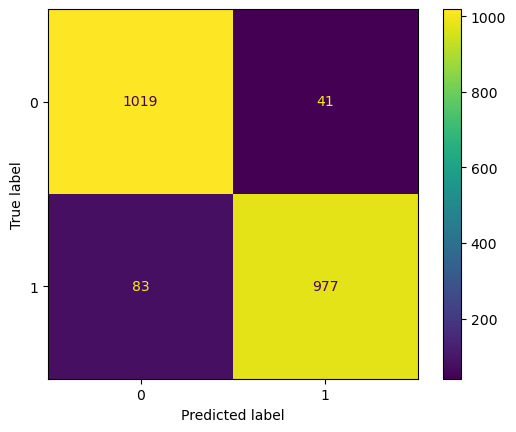

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

lgbm = LGBMClassifier(random_state=random_seed)
lgbm.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(lgbm.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(lgbm.score(X_test_transformed, y_test_transformed)))

pred = lgbm.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, lgbm.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()


In [30]:
acc_train1_LBGM = lgbm.score(X_train_transformed, y_train_transformed)
acc_test1_LBGM = lgbm.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'num_leaves': [31, 63, 127],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000]
             }

In [33]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [31, 63, 127]})

In [34]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


In [35]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.25,0.14,0.00,0.00,0.1,100,31,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.94,0.95,0.95,0.95,0.95,0.95,0.01,1
15,2.10,0.20,0.03,0.00,0.01,1000,31,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",0.93,0.95,0.95,0.95,0.96,0.95,0.01,2
3,0.79,0.02,0.02,0.00,0.1,500,31,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",0.93,0.95,0.95,0.95,0.95,0.95,0.01,3


In [36]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of LBGM classifier on training set: 0.9844
Accuracy of LBGM classifier on test set: 0.9415
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1060
           1       0.96      0.92      0.94      1060

    accuracy                           0.94      2120
   macro avg       0.94      0.94      0.94      2120
weighted avg       0.94      0.94      0.94      2120



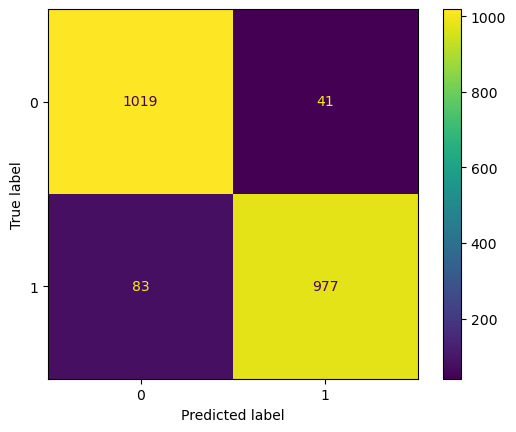

In [37]:
print('Accuracy of LBGM classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LBGM classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [38]:
acc_train2_LBGM = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_LBGM = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [39]:
importances = lgbm.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_LGBM = importance_df

    feature_name  importance
24     Curvature         406
33   Ellipticity         289
22        Extent         187
36    type_micro         160
23  Transparency         159
13     L/T Ratio         141
35   Fiber Width         139
25  Surface Area         113
12    Sphericity         113
19      Solidity         104


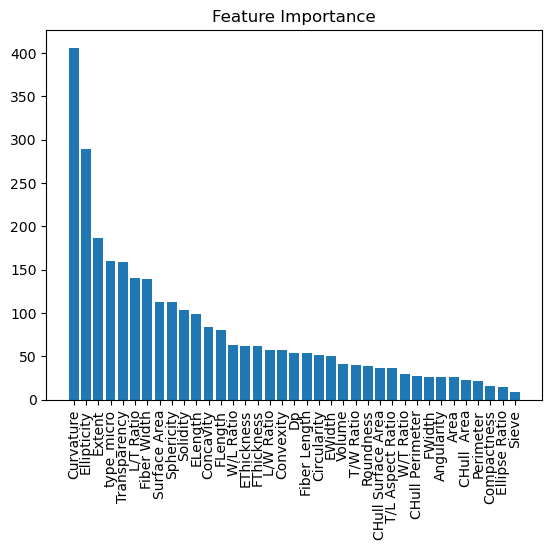

In [40]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### AdaBoost (Adaptive Boosting)

#### Train-test split

In [41]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [42]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [43]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9141
Accuracy of LGBM classifier on test set: 0.9066
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1060
           1       0.92      0.89      0.91      1060

    accuracy                           0.91      2120
   macro avg       0.91      0.91      0.91      2120
weighted avg       0.91      0.91      0.91      2120



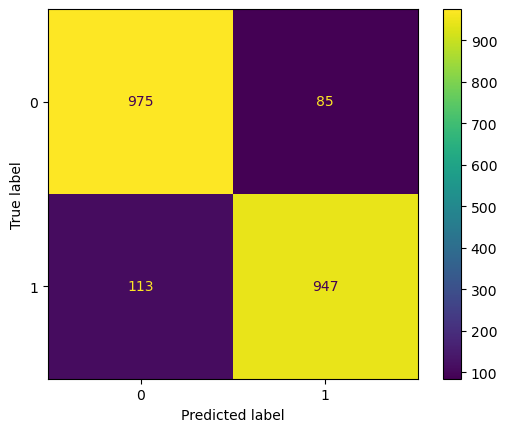

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

ada = AdaBoostClassifier(random_state=random_seed)
ada.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(ada.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(ada.score(X_test_transformed, y_test_transformed)))

pred = ada.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, ada.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

In [46]:
acc_train1_ada = ada.score(X_train_transformed, y_train_transformed)
acc_test1_ada = ada.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [49]:
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [50]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}


In [51]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.18,0.11,0.04,0.00,SAMME.R,1.0,150,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.91,0.92,0.93,0.92,0.92,0.92,0.01,1
16,1.42,0.02,0.03,0.00,SAMME.R,1.0,100,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.90,0.92,0.93,0.91,0.92,0.92,0.01,2
14,2.13,0.02,0.04,0.00,SAMME.R,0.5,150,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,...",0.89,0.92,0.93,0.91,0.91,0.91,0.01,3


In [52]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of AdaBoost classifier on training set: 0.9306
Accuracy of AdaBoost classifier on test set: 0.9203
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1060
           1       0.94      0.90      0.92      1060

    accuracy                           0.92      2120
   macro avg       0.92      0.92      0.92      2120
weighted avg       0.92      0.92      0.92      2120



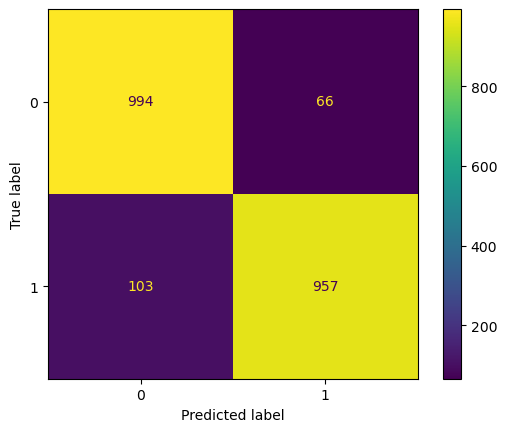

In [53]:
print('Accuracy of AdaBoost classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [54]:
acc_train2_ada = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_ada = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [55]:
importances = ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_ada = importance_df

    feature_name  importance
24     Curvature        0.20
22        Extent        0.10
33   Ellipticity        0.10
25  Surface Area        0.08
26     L/W Ratio        0.06
19      Solidity        0.06
13     L/T Ratio        0.06
4        ELength        0.04
35   Fiber Width        0.04
27     W/L Ratio        0.04


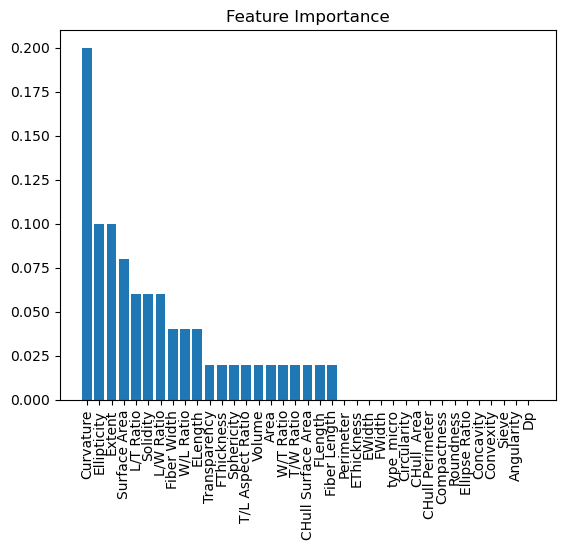

In [56]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Random forest

#### Train-test split

In [57]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [58]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [59]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of RF classifier on training set: 0.9932
Accuracy of RF classifier on test set: 0.9358
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1060
           1       0.95      0.92      0.93      1060

    accuracy                           0.94      2120
   macro avg       0.94      0.94      0.94      2120
weighted avg       0.94      0.94      0.94      2120



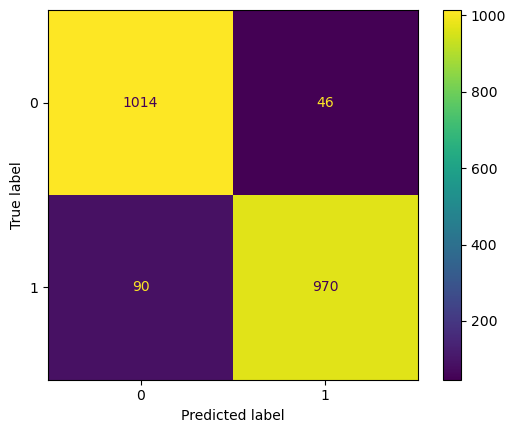

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.4f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [62]:
acc_train1_rf = rf.score(X_train_transformed, y_train_transformed)
acc_test1_rf = rf.score(X_test_transformed, y_test_transformed)

#### Grid search for hyperparameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_leaf_nodes': [10, 20, 30],
#               'class_weight':[None, 'balanced'],
#               'criterion': ['gini', 'entropy']}

In [65]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [66]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [67]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.37,0.00,0.01,0.00,None,10,100,"{'max_depth': None, 'min_samples_split': 10, '...",0.90,0.92,0.92,0.93,0.92,0.92,0.01,1
24,0.04,0.00,0.00,0.00,10,10,10,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.90,0.92,0.93,0.93,0.91,0.92,0.01,2
4,0.18,0.00,0.01,0.00,None,5,50,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.89,0.91,0.91,0.94,0.91,0.91,0.02,3


#### Cross validation

In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Perform cross-validation after grid search
scores = cross_val_score(grid_search, X_test_transformed, y_test_transformed, cv=10)
print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())

Cross-validation scores:  [0.88679245 0.90566038 0.88207547 0.94339623 0.88207547 0.94339623
 0.92924528 0.9245283  0.9245283  0.91981132]
Mean accuracy:  0.9141509433962265


#### Re-run model

Accuracy of Random Forest classifier on training set: 0.9150
Accuracy of Random Forest classifier on test set: 0.9783
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1060
           1       0.99      0.97      0.98      1060

    accuracy                           0.98      2120
   macro avg       0.98      0.98      0.98      2120
weighted avg       0.98      0.98      0.98      2120



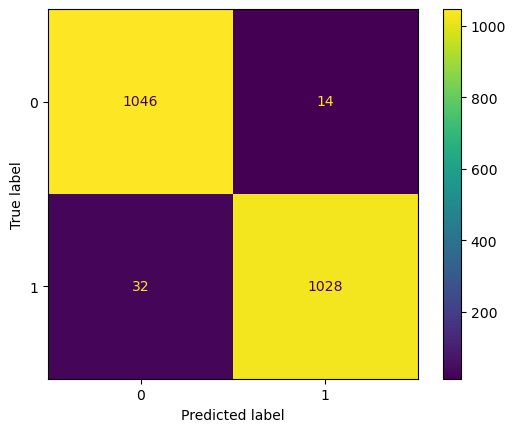

In [69]:
print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [70]:
acc_train2_rf = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_rf = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [71]:
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_rf = importance_df

          feature_name  importance
30  CHull Surface Area        0.12
29           T/W Ratio        0.09
24           Curvature        0.08
25        Surface Area        0.07
2              FLength        0.05
19            Solidity        0.05
7               Volume        0.04
33         Ellipticity        0.04
13           L/T Ratio        0.04
27           W/L Ratio        0.03


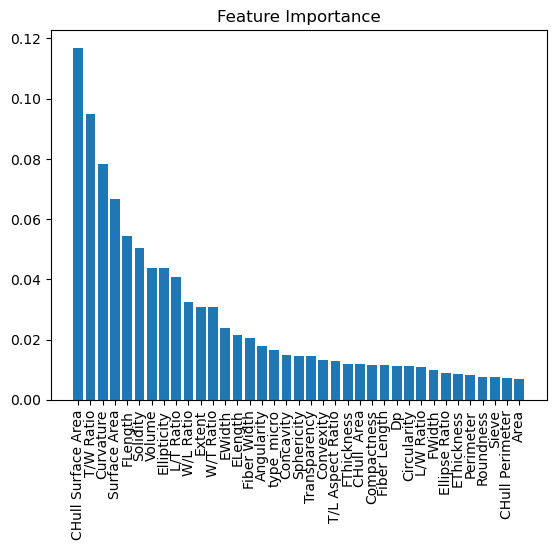

In [72]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Bagging (Bootstrapped Aggregation)

#### Train-test split

In [73]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [74]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [75]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [76]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9161
Accuracy of LGBM classifier on test set: 0.9014
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1060
           1       0.92      0.88      0.90      1060

    accuracy                           0.90      2120
   macro avg       0.90      0.90      0.90      2120
weighted avg       0.90      0.90      0.90      2120



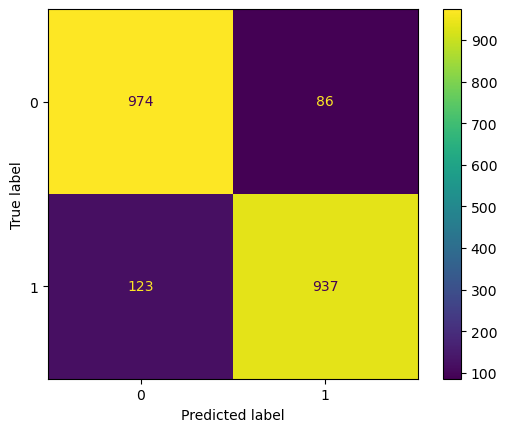

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=random_seed)
bagging.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(bagging.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(bagging.score(X_test_transformed, y_test_transformed)))

pred = bagging.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, bagging.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()

In [78]:
acc_train1_bagging = bagging.score(X_train_transformed, y_train_transformed)
acc_test1_bagging = bagging.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 1.0, 2.0],
              'max_features': [0.5, 1.0, 2.0]}

In [81]:
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150]})

In [82]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


In [83]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.11,0.00,0.02,0.00,1.0,0.5,50,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.90,0.92,0.91,0.91,0.92,0.91,0.01,1
10,2.20,0.01,0.03,0.00,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.90,0.91,0.91,0.91,0.92,0.91,0.01,2
11,3.36,0.09,0.04,0.00,1.0,0.5,150,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.90,0.92,0.91,0.91,0.92,0.91,0.01,3


In [84]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of Bagging classifier on training set: 0.9200
Accuracy of Bagging classifie on test set: 0.9118
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1060
           1       0.93      0.90      0.91      1060

    accuracy                           0.91      2120
   macro avg       0.91      0.91      0.91      2120
weighted avg       0.91      0.91      0.91      2120



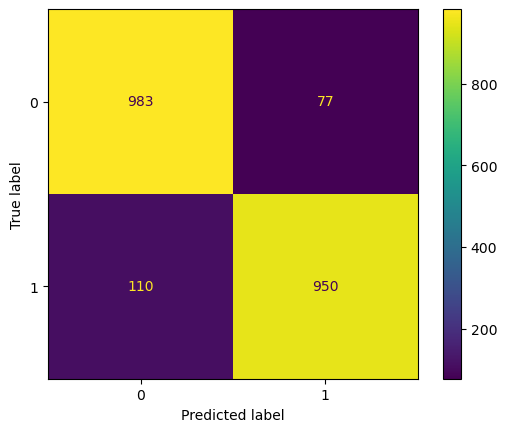

In [85]:
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Bagging classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [86]:
acc_train2_bagging = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_bagging = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [87]:
# importances = bagging.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_bagging = importance_df

In [88]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

### Extra trees

#### Train-test split

In [89]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [90]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [91]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of Extra Trees classifier on training set: 0.9932
Accuracy of Extra Trees classifier on test set: 0.9288
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1060
           1       0.96      0.90      0.93      1060

    accuracy                           0.93      2120
   macro avg       0.93      0.93      0.93      2120
weighted avg       0.93      0.93      0.93      2120



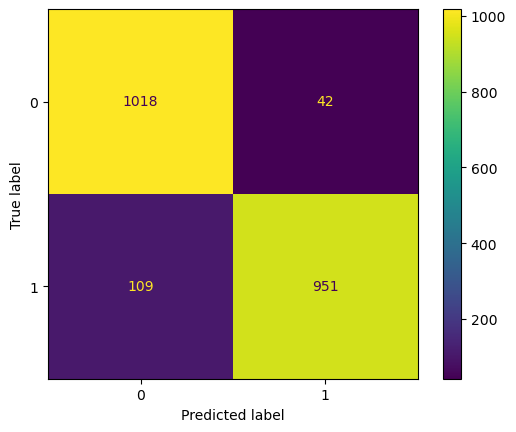

In [93]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

etree = ExtraTreesClassifier(random_state=random_seed)
etree.fit(X_train_transformed, y_train_transformed)
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(etree.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(etree.score(X_test_transformed, y_test_transformed)))

pred = etree.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, etree.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etree.classes_)
disp.plot()

plt.show()

In [94]:
acc_train1_etree = etree.score(X_train_transformed, y_train_transformed)
acc_test1_etree = etree.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'n_estimators': [10, 50, 100, 150],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

In [97]:
grid_search = GridSearchCV(etree, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150]})

In [98]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


In [99]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.32,0.06,0.03,0.01,None,5,150,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.90,0.91,0.92,0.92,0.91,0.91,0.01,1
47,0.22,0.00,0.02,0.00,20,10,150,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.89,0.91,0.92,0.92,0.92,0.91,0.01,2
46,0.15,0.00,0.01,0.00,20,10,100,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.89,0.92,0.92,0.92,0.91,0.91,0.01,2


#### Re-run model

Accuracy of Extra Trees classifier on training set: 0.9092
Accuracy of Extra Trees classifier on test set: 0.9901
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1060
           1       0.99      0.99      0.99      1060

    accuracy                           0.99      2120
   macro avg       0.99      0.99      0.99      2120
weighted avg       0.99      0.99      0.99      2120



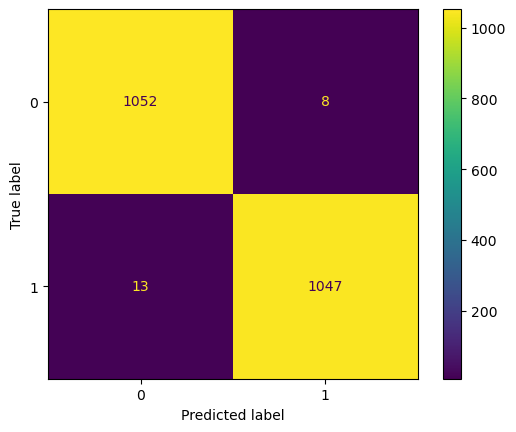

In [100]:
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [101]:
acc_train2_etree = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_etree = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [102]:
importances = etree.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_etree = importance_df

          feature_name  importance
30  CHull Surface Area        0.14
28           W/T Ratio        0.08
19            Solidity        0.07
29           T/W Ratio        0.07
33         Ellipticity        0.07
24           Curvature        0.06
13           L/T Ratio        0.06
27           W/L Ratio        0.05
22              Extent        0.03
35         Fiber Width        0.02


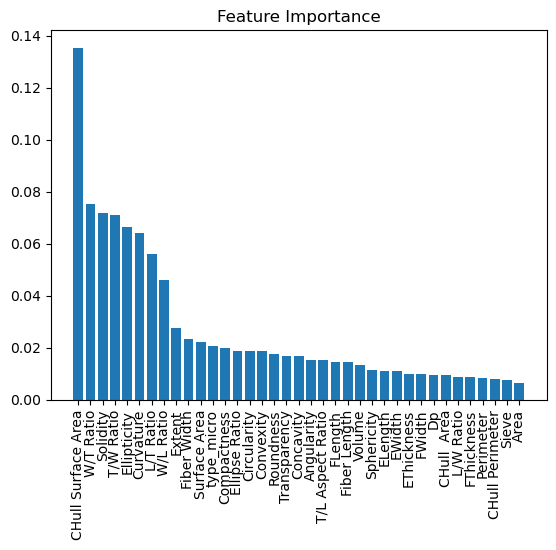

In [103]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### SVC (Support Vector Classification)

#### Train-test split

In [104]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [105]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [106]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LR classifier on training set: 0.9317
Accuracy of LR classifier on test set: 0.9259
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1060
           1       0.96      0.89      0.92      1060

    accuracy                           0.93      2120
   macro avg       0.93      0.93      0.93      2120
weighted avg       0.93      0.93      0.93      2120



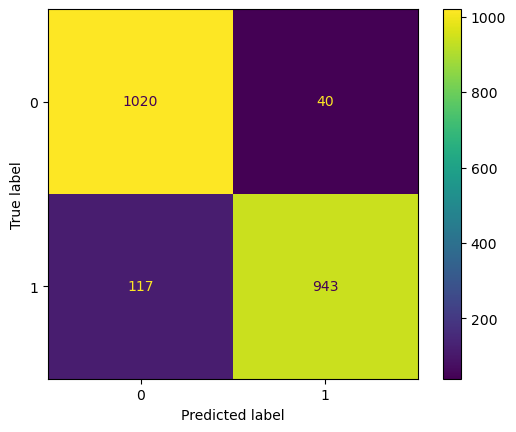

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

svc = SVC(random_state=random_seed)
svc.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LR classifier on training set: {:.4f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(svc.score(X_test_transformed, y_test_transformed)))

pred = svc.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()

In [109]:
acc_train1_svc = svc.score(X_train_transformed, y_train_transformed)
acc_test1_svc = svc.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.01, 0.1, 1]}

In [112]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [113]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [114]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.05,0.00,0.03,0.00,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.91,0.92,0.96,0.94,0.92,0.93,0.02,1
8,0.25,0.05,0.01,0.00,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.91,0.91,0.92,0.94,0.91,0.92,0.01,2
13,0.05,0.00,0.04,0.00,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.90,0.90,0.93,0.94,0.91,0.92,0.02,3


In [115]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of SV classifier on training set: 0.9296
Accuracy of SV classifie on test set: 0.9604
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1060
           1       0.97      0.95      0.96      1060

    accuracy                           0.96      2120
   macro avg       0.96      0.96      0.96      2120
weighted avg       0.96      0.96      0.96      2120



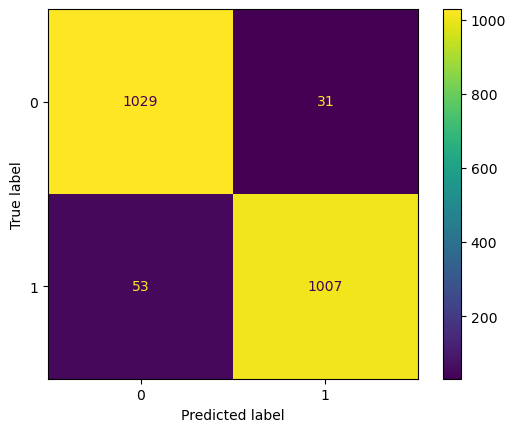

In [116]:
print('Accuracy of SV classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SV classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [117]:
acc_train2_svc = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_svc = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [118]:
# importances = svc.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_svc = importance_df

In [119]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [120]:
### XGBoost

In [121]:
### Gradient Boosting

## Visualizations

### Model accuracies

In [122]:
df = {'model': ['LightGBM', 'AdaBoost', 'Random Forest', 'Bagging', 'Extra Trees', 'SVC'], 
            'train_accuracy': [acc_train1_LBGM, acc_train1_ada, acc_train1_rf, acc_train1_bagging, acc_train1_etree, acc_train1_svc], 
            'test_accuracy': [acc_test1_LBGM, acc_test1_ada, acc_test1_rf, acc_test1_bagging, acc_test1_etree, acc_test1_svc],
            'train_accuracy_CV': [acc_train2_LBGM, acc_train2_ada, acc_train2_rf, acc_train2_bagging, acc_train2_etree, acc_train2_svc], 
            'test_accuracy_CV': [acc_test2_LBGM, acc_test2_ada, acc_test2_rf, acc_test2_bagging, acc_test1_etree, acc_test2_svc]}

accuracy = pd.DataFrame(df)


In [123]:
df = pd.DataFrame(df)
df

,model,train_accuracy,test_accuracy,train_accuracy_CV,test_accuracy_CV
0,LightGBM,0.98,0.94,0.98,0.94
1,AdaBoost,0.91,0.91,0.93,0.92
2,Random Forest,0.99,0.94,0.91,0.98
3,Bagging,0.92,0.90,0.92,0.91
4,Extra Trees,0.99,0.93,0.91,0.93
5,SVC,0.93,0.93,0.93,0.96


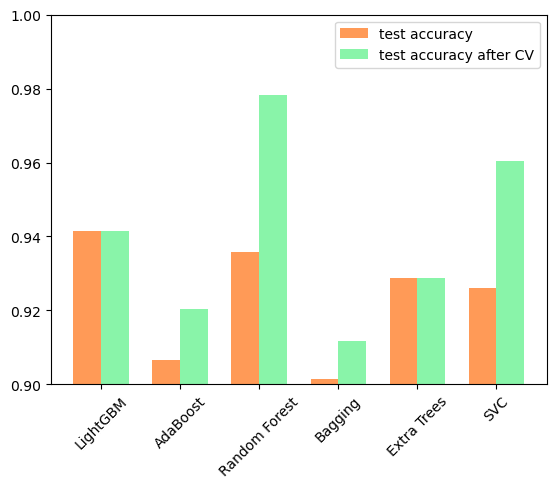

In [124]:
bar_width = 0.35

models = np.arange(len(df['model']))

plt.bar(models - bar_width/2, df['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, df['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

# for i, v in enumerate(df['test_accuracy']):
#     plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

# for i, v in enumerate(df['test_accuracy_CV']):
#     plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

plt.xticks(models, df['model'])
plt.xticks(rotation = 45)
plt.ylim(0.9, 1)
plt.legend()
plt.show()

In [125]:
df.to_csv("accuracy_all_under.csv")

In [126]:
# acc_train1_LBGM
# acc_test1_LBGM

# acc_train1_ada
# acc_test1_ada

# acc_train1_rf
# acc_test1_rf

# acc_train1_bagging
# acc_test1_bagging

# acc_train1_svc 
# acc_test1_svc

# acc_train2_LBGM
# acc_test2_LBGM

# acc_train2_ada 
# acc_test2_ada 

# acc_train2_rf
# acc_test2_rf

# acc_train2_bagging 
# acc_test2_bagging

# acc_train2_svc
# acc_test2_svc

### Overall feature importance

In [127]:
fi_LGBM['importance'] = fi_LGBM['importance'] / fi_LGBM['importance'].sum()

In [128]:
fi_LGBM['rank'] = range(1, fi_LGBM.shape[0]+1)

In [129]:
fi_LGBM.head(5)

,feature_name,importance,rank
24,Curvature,0.14,1
33,Ellipticity,0.10,2
22,Extent,0.06,3
36,type_micro,0.05,4
23,Transparency,0.05,5


In [130]:
fi_LGBM = fi_LGBM[['feature_name','importance']]
fi_LGBM = fi_LGBM.reset_index(drop=True)

In [131]:
fi_ada['rank'] = range(1, fi_ada.shape[0]+1)

In [132]:
fi_ada.head(5)

,feature_name,importance,rank
24,Curvature,0.20,1
22,Extent,0.10,2
33,Ellipticity,0.10,3
25,Surface Area,0.08,4
26,L/W Ratio,0.06,5


In [133]:
fi_ada = fi_ada[['feature_name','importance']]
fi_ada = fi_ada.reset_index(drop=True)

In [134]:
fi_rf['rank'] = range(1, fi_rf.shape[0]+1)

In [135]:
fi_rf.head()

,feature_name,importance,rank
30,CHull Surface Area,0.12,1
29,T/W Ratio,0.09,2
24,Curvature,0.08,3
25,Surface Area,0.07,4
2,FLength,0.05,5


In [136]:
fi_rf = fi_rf[['feature_name','importance']]
fi_rf = fi_rf.reset_index(drop=True)

In [137]:
fi_etree['rank'] = range(1, fi_etree.shape[0]+1)

In [138]:
fi_etree = fi_etree[['feature_name','importance']]
fi_etree = fi_etree.reset_index(drop=True)

In [139]:
fi = pd.concat([fi_LGBM, fi_ada, fi_rf, fi_etree])

In [140]:
mean_rank = fi.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [141]:
mean_rank.head(10)

,importance
feature_name,
Curvature,0.12
Ellipticity,0.08
CHull Surface Area,0.07
Extent,0.06
Solidity,0.05
Surface Area,0.05
L/T Ratio,0.05
T/W Ratio,0.05
W/L Ratio,0.03


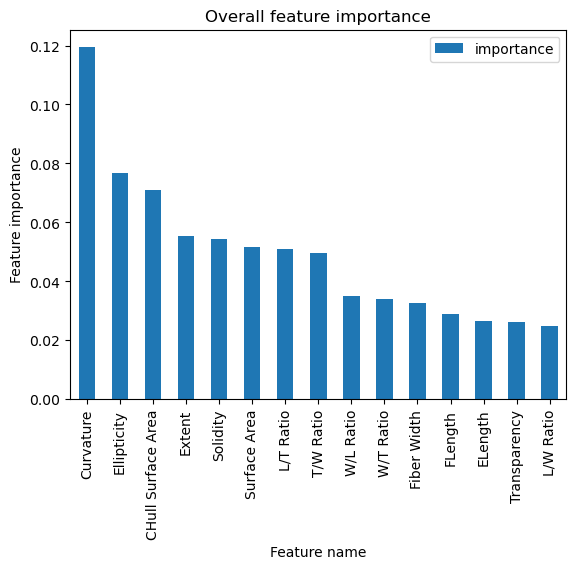

In [142]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(15).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()

In [143]:
mean_rank[['feature_name','importance']].to_csv("fi_all_under.csv")